# Doğrusal Olmayan Regresyon Modelleri

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR
#Gerekli kütüphaneleri import ettik

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN (K En Yakın Komşu)

In [65]:
df = pd.read_csv("Hitters.csv")
#veri setimizi okuttuk
df = df.dropna()
#eksik değerleri sildik.
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
#kategorik değişkenleri kukla değişkenlere çevirdik.
y = df["Salary"]
#bağımlı değişkenimizi belirledik.
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
#bağımlı değişkeni ve diğer kategorik değişkenlerin asıl halini silmiş olduk.
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
#bağımsız değişkenlerimizi oluşturmak için kukla değişkenleri ve kalan değerlerimizi birleştirdik.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#veri setini train ve test olarak ayırdık.

In [66]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


## Model

In [67]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
#Medelimizi fit ederek modelimi kurmuş, eğitmiş oluyoruz.

In [68]:
knn_model

KNeighborsRegressor()

In [69]:
knn_model.n_neighbors
#komşu sayısınıa ulaşıyoruz

5

In [70]:
knn_model.metric

'minkowski'

In [71]:
dir(knn_model)
#model nesnesi içerisinden alınabilecek değerler verilmiştir.

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'feature_names_in_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',
 'n_jobs',
 'n_neighbors',
 'n_s

In [72]:
knn_model.predict(X_test)[0:5]
#Burada bağımsız değişkenleri kullanarak bağımlı değişken değerlerini tahmin etmiş olacağız.

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [73]:
y_pred = knn_model.predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, y_pred))
#Hata kareler ortalamasının karekökünü hesapladık.Bu bizim İlkel Test Hatamızdır.

426.6570764525201

## Model Tuning

In [75]:
knn_model

KNeighborsRegressor()

In [76]:
RMSE = []

for k in range(10):
    k = k + 1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)
#Buradaki en küçük RMSE değeri k komşu sayısı için seçilebilir.

k= 1 için RMSE değeri: 455.03925390751965
k= 2 için RMSE değeri: 415.99629571490965
k= 3 için RMSE değeri: 420.6765370082348
k= 4 için RMSE değeri: 428.8564674588792
k= 5 için RMSE değeri: 426.6570764525201
k= 6 için RMSE değeri: 423.5071669008732
k= 7 için RMSE değeri: 414.9361222421057
k= 8 için RMSE değeri: 413.7094731463598
k= 9 için RMSE değeri: 417.84419990871265
k= 10 için RMSE değeri: 421.6252180741266


In [77]:
#GridSearchCV
#Kullanacak oldupumuz Makine Öğrenmesi Algoritmalarında belirlemeye çalıştığımız hiperparametrelerin değerlerini belirlemek için kullanılan bir fonksiyondur.
#Bu fonksiyon en iyi değeri bize otomatik olarak veriyor.

In [78]:
knn_params = {"n_neighbors": np.arange(1,30,1)}
#aranacak olan parametre değerlerimiz.

In [79]:
knn = KNeighborsRegressor()

In [80]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [81]:
knn_cv_model.best_params_
#En iyi parametre değerini veriyor bize.Bizim el yordamıyla hesapladığımız değeri otomatik olarak vermiş oldu.

{'n_neighbors': 8}

In [82]:
#final model
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [83]:
y_pred = knn_tuned.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

# Destek Vektör Regresyonu (Support Vector Regression)

In [85]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [92]:
svr_model = SVR().fit(X_train, y_train)

In [93]:
svr_model

SVR()

In [94]:
svr_model.predict(X_train)[0:5]

array([404.04653122, 475.7979806 , 447.47083279, 416.62375328,
       451.10639712])

In [95]:
svr_model.predict(X_test)[0:5]

array([467.17641555, 446.40313543, 478.61634896, 407.90736132,
       478.21333994])

In [96]:
svr_model.intercept_

array([445.20012207])

In [99]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [102]:
svr_model = SVR()

In [103]:
svr_model

SVR()

In [104]:
svr_params = {"C": [0.1,0.5,1,3]}

In [106]:
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [108]:
svr_cv_model.best_params_
#ceza parametresi değeri

{'C': 3}

In [110]:
svr_tuned = SVR(C = 0.5).fit(X_train, y_train)

In [111]:
y_pred = svr_tuned.predict(X_test)

In [112]:
np.sqrt(mean_squared_error(y_test, y_pred))

466.43275094828505

# Yapay Sinir Ağları

In [113]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model & Tahmin

In [114]:
#Bu bölümde diğerlerinden farklı olarak değişkenlerimize standartlaştırma işlemleri gerçekleştiricez.Makine Öğrenmesinde bazı algoritmalar heterojen veri setleri üzerinde iyi çalışırken
#bazı algoritmalar homojen veri setleri üzerinde iyi çalışır.Yapay Sinir ağları da homojen veri setleri üzerinde daha iyi çalışan bir algoritmadır.Çünkü hataların optimizasyonu noktasın
#da yapılan türevleme işlemlerinde ortaya çıkmış olan aykırıklıkların yani gerçek değerler ile tahmin değerleri arasında ciddi farklar oluşturan değerlerin ortaya çıkarabildiği bazı
#değerler söz konusudur.Bundan dolayı Yapay Sinir Ağlarını standartlaştırma işlemi sonrasında kullanmak daha sağlıklı olmaktadır.

In [122]:
scaler = StandardScaler()

In [120]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [124]:
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
#Test ve train için dönüştürme işlemini gerçekleştirmiş olduk.

In [126]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)

In [127]:
mlp_model.predict(X_test_scaled)[0:5]

array([21.0623233 , 34.68864082, 64.2275605 , 11.54748812, 25.66656928])

In [128]:
y_pred = mlp_model.predict(X_test_scaled)

In [130]:
np.sqrt(mean_squared_error(y_test, y_pred))

661.1662770596461

## Model Tuning

In [131]:
mlp_model

MLPRegressor()

In [133]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001],
             "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}
#hidden_layer_sizes gizli katman sayısını ifade ediyor.Mesela burada (10,20) iki katman var ve nöron sayısı 10 ve 20'dir.

In [135]:
mlp_model_cv = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [136]:
mlp_model_cv.best_params_

{'alpha': 0.02, 'hidden_layer_sizes': (100, 100)}

In [139]:
#final modelimiz.
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [140]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [141]:
np.sqrt(mean_squared_error(y_test, y_pred))

354.59766893005036

# CART (Classification and Regression Tree)

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])
#Burada yeni bir metodolojiye giriş yapıyor olduğumuz için yani CART ağaca dayalı bir yöntemle ilk defa karşılaşıyor olduğumuz için 2 tane değişken seçip işlemlerimizi bu iki değişken
#üzerinden sürdürmeye devam edeceğiz.

## Model & Tahmin

In [9]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 3)
#max_leaf_nodes maksimum yaprak node sayısını ifade ediyor.Dallanma kontrolünü sağlayacak bir parametredir.

In [10]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=3)

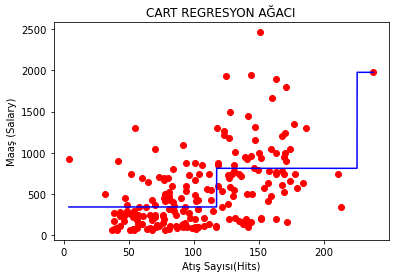

In [11]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
  
plt.scatter(X_train, y_train, color = 'red') 
  
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  

plt.title('CART REGRESYON AĞACI')  
plt.xlabel('Atış Sayısı(Hits)') 
plt.ylabel('Maaş (Salary)') ;
#Atış sayısı ile maaş arasındaki ilişkiyi görselleştirdik.

In [12]:
#tek değişkenli tahmin

In [14]:
cart_model.predict(X_test)[0:5]

array([813.0988    , 813.0988    , 813.0988    , 345.20115517,
       345.20115517])

In [15]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

In [16]:
#tüm değişkenler için

In [30]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [31]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [32]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

439.5948377750468

## Model Tuning

In [33]:
cart_model

DecisionTreeRegressor()

In [40]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

391.5530522634766

In [37]:
#CART yöntemi genellenebilirlik kaygısı olmayan ve mevcut durumu ifade etmek için makine öğrenmesi algoritması kullanmak istediğimiz senaryolarda en başarılı olan algoritmalardan birisidir.

In [41]:
# max_depth: maksimum derinlik bu ağacın ne kadar derinleşeceğini ifade ediyor
# min_samples_split: bölünmelerde son nodeda, en son bir dala indik diyelim, bir yaprağa indik diyelim, bu yaprakda bölme işlemi yapacak mıyız, yapmayacak mıyız? Bu yaprağı bir dala dönüştürecek miyiz dönüştür
# meyecek miyiz sorusuna karar vermek için o yaprakda minimum olması gereken gözlem sayısını ifade etnektedir. Yani örneğin dallanmalar başladı. Peki nereye kadar dallanma işlemi gerçekleşecek? İşte burada 
# bu dallanmayı kontrol edebilmek adına kullanılan bir hiperparametredir. Örneğin burada 2 dediğimizde bir dalda 2 gözlem varsa dallanma devam edecektir.2'den az kaldığında dallanma olmayacaktır.Gereken minimum
# örnek sayısı ifade edilmektedir bölme işlemi olarak değerlendirebilmek adına.
# min_samples_leaf: Bir leaf nodeun yani son yaprak nodeun en sonda kalan yaprağın yaprak olarak tanımlanması için gerekli olan örnek sayısını ifade etmektedir.Bu bir yapraktır artık demek için göz önünde
# bulundurulması gereken hiperparametre değeridir.

In [46]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,50,30,10]}

In [47]:
cart_model = DecisionTreeRegressor()

In [48]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [49]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [52]:
cart_tuned_model =  DecisionTreeRegressor(max_depth = 10, min_samples_split = 50).fit(X_train, y_train)

In [54]:
y_pred = cart_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

# Random Forests

In [55]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [56]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [57]:
rf_model

RandomForestRegressor(random_state=42)

In [58]:
# max_features: bölünmelerde göz önünde bulundurulacak olan değişken sayısını ifade ediyor.
# max_leaf_modes: maksimum yaprak nodelarını ifade ediyor.
# min_samples_split: bir node bölünmeden önce bu nodedaki minimum gözlem sayısını ifade ediyor.Yani ancak bu kadar gözlem varsa bölmeye devam et işlemi için kullanılıyor.
# min_sampkes_leaf: leaf nodedaki minimum gözlem sayısını ifade ediyor.
# n_estimators: kullanılacak olan ağaç sayısını ifade ediyor.

In [59]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model & Tahmin

In [61]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model
# en önemli iki hiperparametre fit edilecek ağaç sayısıdır yani n_estimators parametresidir.İkincisi ise bölünme işlemlerinde göz önünde bulundurulacak olan değişken sayısıdır.Üçüncüsü ise min_samples_splittir.

RandomForestRegressor(random_state=42)

In [62]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200,500,1000,2000],
            "min_samples_split": [2,10,80,100]}

In [63]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [65]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [69]:
rf_model = RandomForestRegressor(random_state = 42,max_depth = 8, max_features = 2, min_samples_split = 2, n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [70]:
rf_tuned

RandomForestRegressor(max_depth=8, max_features=2, n_estimators=200,
                      random_state=42)

In [71]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

## Değişken Önem Düzeyi

Bu kavram bize modelleme işlemleri sırasında göz önünde bulundurmamız gereken ya da odaklanmamız gereken değişkenleri görmek adına bir imkan sağlamaktadır.Örneğin buradaki random foresta ilişkin yapılan model
leme çalışmasında değişkenlerin önem düzeyine erişmek istiyoruz.

In [72]:
rf_tuned.feature_importances_*100

array([5.81548333, 6.38504706, 3.52630602, 4.18186433, 4.68121896,
       4.92291235, 7.38388416, 9.72940722, 8.68736867, 7.89130478,
       8.78157948, 8.30862336, 9.69431474, 4.71131944, 2.04114365,
       1.83878075, 0.38469815, 0.55485771, 0.47988582])

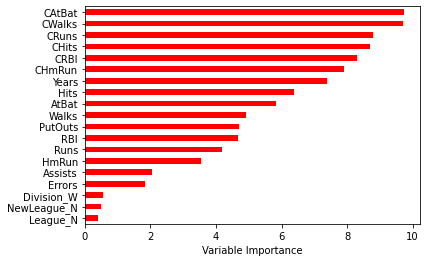

In [73]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
gbm_model

GradientBoostingRegressor()

In [6]:
y_pred = gbm_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

352.75331749961015

## Model Tuning

In [8]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)
gbm_model

GradientBoostingRegressor()

In [9]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\programdata\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regression and is a robust loss function. 'huber' is a
    combination of the two. 'quantile' allows quantile regression (use
    `alpha` to specify the quantile).

    .. deprecated:: 1.0
        The loss 'ls' was

In [10]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [11]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [12]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs=-1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [13]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.5}

In [14]:
gbm_tuned =  GradientBoostingRegressor(learning_rate=0.01, loss="lad", max_depth=3,n_estimators=500, subsample=0.5).fit(X_train, y_train)

In [15]:
y_pred = gbm_tuned.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

330.6005114797945

In [17]:
#Değişken Önem Düzeyleri

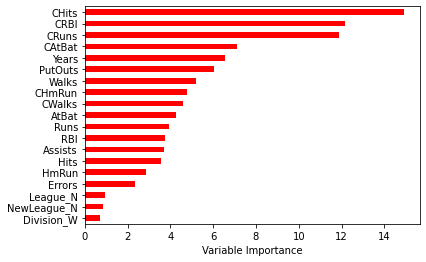

In [18]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100}, 
                          index = X_train.columns)


Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [19]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## Model & Tahmin

In [20]:
!pip install xgboost

In [23]:
import xgboost

In [24]:
from xgboost import XGBRegressor

In [25]:
xgb = XGBRegressor().fit(X_train, y_train)

In [26]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [27]:
y_pred = xgb.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Model Tuning

In [29]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [32]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
             "colsample_bytree": [0.4,0.7,1]}
# learning_rate overfittingi engellemek adına kullanılan bir parametredir.Daraltma adım boyunu ifade etmektedir.
# n_estimators kullanılacak olan ağaç sayısını ifade ediyor.Tahminci sayısını ifade ediyor.
# colsample_bytree oluşturulacak olan ağaçlarda değişkenlerden alınacak olan alt küme oranını ifade ediyor.

In [31]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [33]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [34]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4, learning_rate = 0.1, max_depth = 2, n_estimators = 1000).fit(X_train, y_train)

In [36]:
y_pred = xgb_tuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.8515299923177

# LightGBM

In [38]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [39]:
!pip install lightgbm

In [40]:
from lightgbm import LGBMRegressor

## Model & Tahmin

In [42]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [43]:
lgb_model

LGBMRegressor()

In [44]:
y_pred = lgb_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [46]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor()

In [47]:
lgbm_params = {"learning_rate": [0.01, 0.1, 0.5, 1],
              "n_estimators": [20,40,100,200,500,1000],
              "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [48]:
lgbm_cv_model = GridSearchCV(lgb_model, 
                             lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


In [49]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [50]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 20).fit(X_train, y_train)

In [52]:
y_pred = lgbm_tuned.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

# CatBoost

In [54]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [55]:
!pip install catboost

## Model & Tahmin

In [56]:
from catboost import CatBoostRegressor

In [57]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 153ms	remaining: 2m 33s
1:	learn: 431.3923642	total: 156ms	remaining: 1m 17s
2:	learn: 424.8820360	total: 158ms	remaining: 52.4s
3:	learn: 418.2514904	total: 160ms	remaining: 39.8s
4:	learn: 412.6394021	total: 163ms	remaining: 32.4s
5:	learn: 406.6247020	total: 164ms	remaining: 27.2s
6:	learn: 400.5321206	total: 166ms	remaining: 23.6s
7:	learn: 394.6683437	total: 168ms	remaining: 20.9s
8:	learn: 388.2496484	total: 170ms	remaining: 18.7s
9:	learn: 382.9448842	total: 172ms	remaining: 17s
10:	learn: 377.2600080	total: 174ms	remaining: 15.7s
11:	learn: 372.4829606	total: 176ms	remaining: 14.5s
12:	learn: 366.6823437	total: 178ms	remaining: 13.5s
13:	learn: 362.6076230	total: 181ms	remaining: 12.7s
14:	learn: 358.0107745	total: 183ms	remaining: 12s
15:	learn: 353.2802665	total: 185ms	remaining: 11.4s
16:	learn: 348.5646265	total: 187ms	remaining: 10.8s
17:	learn: 343.6407912	total: 189ms	remaining: 10.3s
18:	learn: 339.2363847	total

In [58]:
dir(catb_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_base_calc_leaf_indexes',
 '_base_drop_unused_features',
 '_base_eval_metrics',
 '_base_predict',
 '_base_shrink',
 '_base_virtual_ensembles_predict',
 '_calc_fstr',
 '_calc_leaf_indexes',
 '_calc_ostr',
 '_check_is_compatible_loss',
 '_convert_to_asymmetric_representation',
 '_deserialize_model',
 '_estimator_type',
 '_eval_metrics',
 '_fit',
 '_get_borders',
 '_get_cat_feature_indices',
 '_get_default_prediction_type',
 '_get_embedding_feature_indices',
 '_get_float_feature_indices',
 '_get_nan_treatments',
 '_get_params',
 '_get_tags',
 '_get_text_feature

In [59]:
y_pred = catb_model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [61]:
catb_model = CatBoostRegressor()

In [62]:
catb_params = {"iterations": [200,500,100],
              "learning_rate": [0.01,0.1],
              "depth": [3,6,8]}
#iterations burada ağaç sayısıdır.Fit edilecek model sayısıdır.

In [63]:
catb_cv_model = GridSearchCV(catb_model, 
                           catb_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 1.41ms	remaining: 280ms
1:	learn: 404.8723520	total: 2.74ms	remaining: 271ms
2:	learn: 387.4057666	total: 3.92ms	remaining: 257ms
3:	learn: 372.2801584	total: 5.01ms	remaining: 246ms
4:	learn: 358.9204229	total: 6.2ms	remaining: 242ms
5:	learn: 347.0083933	total: 7.28ms	remaining: 235ms
6:	learn: 336.0130818	total: 8.43ms	remaining: 233ms
7:	learn: 324.3923300	total: 9.45ms	remaining: 227ms
8:	learn: 314.8690957	total: 10.8ms	remaining: 228ms
9:	learn: 308.5075563	total: 12ms	remaining: 228ms
10:	learn: 298.8587285	total: 12.9ms	remaining: 222ms
11:	learn: 294.7655438	total: 14.3ms	remaining: 224ms
12:	learn: 288.0697862	total: 15.4ms	remaining: 221ms
13:	learn: 282.6697154	total: 16.3ms	remaining: 216ms
14:	learn: 277.6121667	total: 17.2ms	remaining: 212ms
15:	learn: 273.4383979	total: 18.2ms	remaining: 209ms
16:	learn: 269.1556201	total: 19.2ms	remaining: 207ms
17:	learn: 264.8098704	total: 20.3

In [64]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [65]:
catb_tuned = CatBoostRegressor(depth = 3, iterations = 200, learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 425.7900818	total: 957us	remaining: 191ms
1:	learn: 404.8723520	total: 2.07ms	remaining: 205ms
2:	learn: 387.4057666	total: 3.01ms	remaining: 198ms
3:	learn: 372.2801584	total: 3.96ms	remaining: 194ms
4:	learn: 358.9204229	total: 4.84ms	remaining: 189ms
5:	learn: 347.0083933	total: 5.6ms	remaining: 181ms
6:	learn: 336.0130818	total: 6.44ms	remaining: 177ms
7:	learn: 324.3923300	total: 7.38ms	remaining: 177ms
8:	learn: 314.8690957	total: 8.21ms	remaining: 174ms
9:	learn: 308.5075563	total: 9ms	remaining: 171ms
10:	learn: 298.8587285	total: 9.82ms	remaining: 169ms
11:	learn: 294.7655438	total: 10.7ms	remaining: 167ms
12:	learn: 288.0697862	total: 11.5ms	remaining: 166ms
13:	learn: 282.6697154	total: 12.3ms	remaining: 163ms
14:	learn: 277.6121667	total: 13.1ms	remaining: 162ms
15:	learn: 273.4383979	total: 13.9ms	remaining: 160ms
16:	learn: 269.1556201	total: 14.8ms	remaining: 159ms
17:	learn: 264.8098704	total: 15.7ms	remaining: 159ms
18:	learn: 261.6700768	total: 16.7ms	remain

In [66]:
y_pred = catb_tuned.predict(X_test)

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.3125832615482

# MAKİNE ÖĞRENMESİ GÖREVLERİNİN OTOMATİKLEŞTİRİLMESİ

In [80]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [81]:
def compML(df, y, alg): #İlk argüman veri setimiz.İkincisi bağımlı değişkenimiz.Üçüncüsü algoritma ismi.
    #train-test ayrimi
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    #modelleme
    model = alg().fit(X_train, y_train)#ben buraya hangi algoritmayı girersem bu algoritma burada bu kısmı çalıştıracak.
    y_pred = model.predict(X_test)#modeli tahmin ettik.
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))#Hata kareler ortalaması karekökünü hesapladık.
    model_ismi = alg.__name__
    print(model_ismi, "Modeli Test Hatası:",RMSE)

In [82]:
compML(df, "Salary", LGBMRegressor)

LGBMRegressor Modeli Test Hatası: 363.8712087611089


In [83]:
models = [LGBMRegressor, 
          XGBRegressor, 
          GradientBoostingRegressor, 
          RandomForestRegressor, 
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor, 
          SVR]
#ELİMİZDE BİR MODEL NESNESİ VAR VE ELİMİZDEKİ FONKSİYON BU MODELLERİN İÇİNDE GEZECEK.

In [84]:
for i in models:
    compML(df, "Salary", i)

LGBMRegressor Modeli Test Hatası: 363.8712087611089
XGBRegressor Modeli Test Hatası: 355.46515176059927
GradientBoostingRegressor Modeli Test Hatası: 353.2348533661816
RandomForestRegressor Modeli Test Hatası: 343.4646322420088
DecisionTreeRegressor Modeli Test Hatası: 490.95552273821255
MLPRegressor Modeli Test Hatası: 424.2975131755213
KNeighborsRegressor Modeli Test Hatası: 426.6570764525201
SVR Modeli Test Hatası: 460.0032657244849
